# Introduction

Bayesian inference derives the posterior probability as a consequence of two antecedents: 

1. a prior probability,
2. a "likelihood function" derived from a statistical model for the observed data. 

Bayesian inference computes the **posterior probability** according to Bayes' theorem:

\begin{equation}
P(\theta| X) = \frac{P(\theta) \, P(X | \theta)} {P(X)} \propto P(\theta) \, P(X | \theta)
\end{equation}

where

- $P(\theta|X)$ : posterior probability $\leftarrow$ how probable is the evidence of $\theta$ given $X$ is true 
- $P(X|\theta)$: likelihood $\leftarrow$ probability of event $X$ occuring given the condition $\theta$ is true
- $P(\theta)$: prior (marginal) probability $\leftarrow$ probability observing $\theta$ without any condition
- $P(X)$: predictor (marginal) prior probability $\leftarrow$ probability observing $X$ without any condition


So, when performing Bayesian inference, we aim to compute and use the **full posterior joint distribution** over a set of random variables. Unfortunately, this requires in most applied circumstances calculation of intractable integrals. That is when sampling techniques based upon **Markov Chain Monte Carlo** (MCMC) methods come to mitigate the difficulty of solving complex analytical equations. When proceeding with MCMC methods, we estimate the posterior distribution and calculate the intractable integrals by using simulated samples from the posterior distribution.

# Metropolis-Hastings Algorithm

The Metropolis-Hastings algorithm is an MCMC method for obtaining a **sequence of random samples** from a **probability distribution** from which direct sampling is difficult. 

The Metropolis-Hastings algorithm simulates samples from a probability distribution by making use of the full **joint density function** and (independent) proposal distributions for each of the variables of interest.

## Why Metropolis-Hastings 
The Metropolis-Hastings algorithm draws samples from any probability distribution ${\displaystyle P(x)}$, provided that a function ${\displaystyle f(x)}$ is known and is proportional to the density of ${\displaystyle P}$, and the values of ${\displaystyle f(x)}$ can be calculated. The requirement that ${\displaystyle f(x)}$ must only be *proportional* to the density, rather than exactly equal to it, makes the Metropolis-Hastings algorithm particularly useful, because calculating the necessary normalization factor is often extremely difficult in practice.

## Working Principle
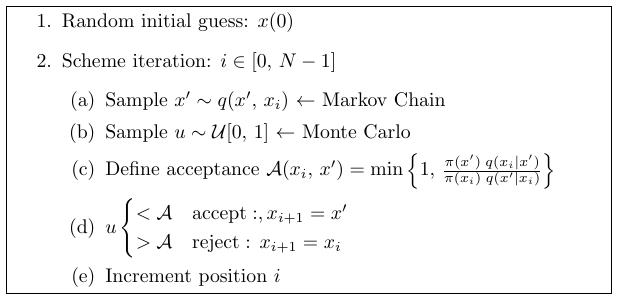
<p style="text-align: center;"> Figure: The Metropolis-Hastings algorithm in a nutshell. </p>

The Metropolis-Hastings algorithm consists in the following synthesis for $n$ iterations:


- Initialize state at $t=0$, $\displaystyle{ x_0 \sim q(x)}$
- Iterate up to $t \leq n$:
 - Propose a random **candidate state $x^\prime$** according to a **proposal distribution** depending on the current position $\rightarrow$ Sample $x^\prime$ from $\displaystyle{q(x^\prime|x_{t})}$ -- property of Markov Chain;
 - Calculate the acceptance probability uppon the **proposal distribution**, $q$, and the **full joint density** $\pi$:
 \begin{equation}
 {\displaystyle \alpha(x^\prime | x_{t})=\min{ {\Big\{} 1,\, \frac{q(x_{t}|x^\prime)\, \pi(x^\prime)}{q(x^\prime|x_{t})\, \pi(x_{t})}} \Big{\}}}
 \end{equation}
 - Generate a uniform random number ${\displaystyle u\in [0,1]}$ $\rightarrow$ Sample $u \sim U[0,\,1]$  -- property of Monte Carlo
 - Accept or reject using an **acceptance function** $\cal A$:
   - if ${\displaystyle u\leq \alpha(x^\prime,\,x_{t})} \Rightarrow$ accept the new state with an acceptance probability $\alpha$ and set ${\displaystyle x_{t+1}=x^\prime}$;
   - if ${\displaystyle u>\alpha(x^\prime,\,x_{t})} \Rightarrow$ reject the new state with a probability $1-\alpha$ and copy the old state forward ${\displaystyle x_{t+1}=x_{t}}$;
  - Increament $t$ to $t+1$.
 
The first step is to pick up an initial state $x_{t=0}$. This is  done by initializing the sample value for each random variable. This value is often sampled from the variable’s prior distribution. The main iterative process of the Metropolis-Hastings algorithm consists basically of three components:

1. Generation of a proposal/random candidate state from the proposal distribution $\displaystyle{q(x_t|x_{t-1})}$.
2. Calculation of the acceptance probability via the the acceptance function ${\displaystyle \alpha(x^\prime | x_{t-1})}$ to accept the proposed state $x^\prime$ according to to the proposal distribution and the full joint probability $\pi$. 
At this point, the algorithm uses uses a Markov process, which asymptotically reaches a unique stationary distribution ${\displaystyle \pi (x)}$ such that ${\displaystyle \pi (x)=P(x)}$, where ${\displaystyle P(x)}$ is the desired distribution according to which the algorithm is expected to draw a collection of states. The existence of stationary distribution ${\displaystyle \pi (x)}$ is necessary. A sufficient but not necessary condition is "detailed balance", which requires that each transition ${\displaystyle x\to x^\prime}$ is reversible: for every pair of states ${\displaystyle x,\,x^\prime}$, the probability of being in state ${\displaystyle x}$ and transitioning to state ${\displaystyle x^\prime}$ must be equal to the probability of being in state ${\displaystyle x^\prime}$ and transitioning to state ${\displaystyle x}$. Mathematically, ${\displaystyle \pi (x)P(x^\prime \mid x)=\pi (x')P(x\mid x')}$. 

3. Accept the candidate sample with probability $\alpha$, the acceptance probability, or reject it with
probability $1-\alpha$. 

Therefore, the new state ${\displaystyle x_{t+1}}$ is chosen according to the following rules:

If ${\displaystyle a\geq 1{:}}$

$\quad {\displaystyle x_{t+1}=x^\prime}$

else:

$\quad \displaystyle x_{t+1}= {\begin{cases}x^\prime&{\text{with probability }}a, \\ x_{t}&{\text{with probability }}1-a.\end{cases}}$

With this term $\frac{ \pi(x^\prime)}{\pi(x_{t})}$ we are comparing the probability of our proposal point to the point we are already are.

This term $\frac{q(x_{t}|x^\prime)}{q(x^\prime|x_{t})}$ uses the proposal function. In particular, $q(x_{t}|x^\prime)$ is the propability of the point we are standing given our proposal point, and $q(x^\prime|x_{t})$ is the probability moving to the proposal point given that we were at the previous point. 

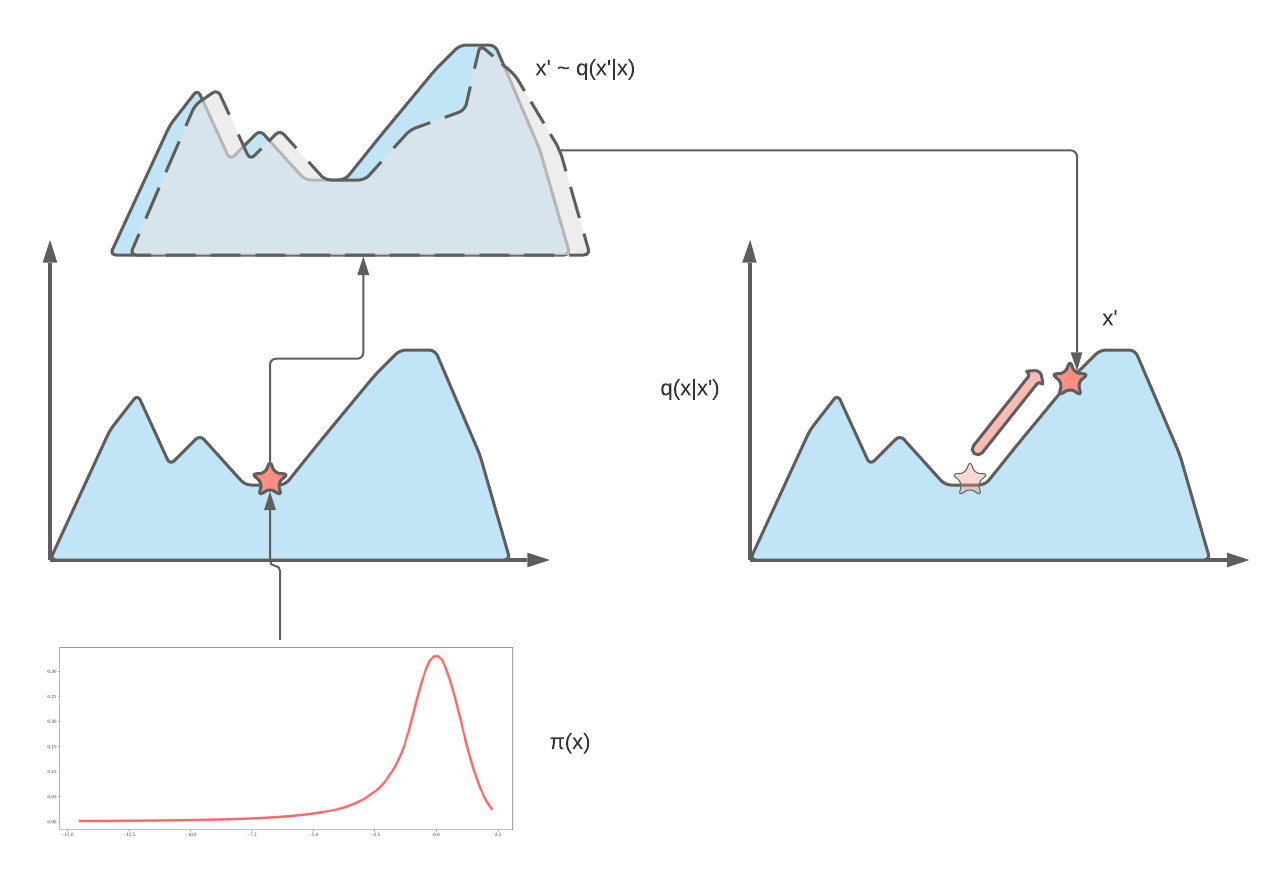
<p style="text-align: center;"> Figure: The proposal distribution q proposes the next point to which the random walk might move. </p>


## The Proposal Distribution

The Metropolis-Hastings algorithm starts off with simulating a candidate sample at $t=0$ $x_0$ from the proposal distribution $q(x)$. Samples from the proposal distribution are not accepted automatically as posterior samples. The candidate samples $x^\prime$ at $t$ are instead accepted probabilistically based on the acceptance probability ${\displaystyle \alpha(x^\prime | x_{t-1})}$. 


There are mainly two kinds of proposal distributions, symmetric and asymmetric. 

### Symmetric proposal distributions
A proposal distribution is a symmetric distribution if $\displaystyle q(x_t | x_{t-1}) = q(x_{t-1}|x_t)$.  Straightforward choices of symmetric proposals include the Gaussian distribution or Uniform distribution centered at the current state of the Markov chain.

For example, in the case of a Gaussian proposal distribution, we have $x^\prime = x_{t-i} + \text{Normal}(\mu=0,\,\sigma)$. For the pdf of a gaussian function it holds 

\begin{equation}
\text{Normal}(x^\prime - x_{t-1};\, 0,\,\sigma) = \text{Normal}(x_{t-1} - x^\prime;\, 0,\,\sigma)
\end{equation}

and therefore, the gaussian proposal distribution  is symmetric. 

The proposal distribution perturbs the current state of the chain in a random way, and then either accepts or rejects the pertubed value which is sampled from the proposal distribution. Algorithms of this kind are called **Random-walk Metropolis algorithm**. So, in the Metropolis algorithm, the ratio term with the unnormalized posterior distributions $\frac{q(x_{t}|x^\prime)}{q(x^\prime|x_{t})}$ disappears because we choose $q$ such that it creates a symmetric random walk.  

### Asymmetric proposal distributions
Metropolis-Hastings algorithms are the most common random walk algorithms. However, in some circumstances we might need to choose asymmetric proposal distributions. For instance, we may choose a proposal distribution that is inherently asymmetric, such as the **log-normal density function**, which is a continuous probability distribution of a random variable whose logarithm is normally distributed and is skewed towards larger values,

\begin{equation}
\displaystyle f(x)={\frac {1}{x\sigma {\sqrt {2\pi \,}}}}\exp \left(-{\frac {(\ln x-\mu )^{2}}{2\sigma ^{2}}}\right)
\end{equation}


In other cases, it might be needed to work with asymmetric proposal distributions to accommodate for particular constraints in the models. For example, if it is desired to estimate the posterior distribution for a variance
parameter, we must require that the proposal distribution does not generate negative values.

## The Acceptance Function


Suppose that the most recent value sampled is ${\displaystyle x_{t}}$. To follow the Metropolis-Hastings algorithm, we next draw a new proposal state ${\displaystyle x^\prime}$ with posterior probability density ${\displaystyle q(x^\prime\mid x_{t})}$ and calculate a value

\begin{equation}
{\displaystyle a=a_{1}a_{2},}
\end{equation}

where

\begin{equation}
{\displaystyle a_{1}={\frac {\pi(x^\prime)}{\pi(x_{t})}}}
\end{equation}

is the probability (e.g., Bayesian posterior) ratio between the proposed sample ${\displaystyle x^\prime}$ and the previous sample ${\displaystyle x_{t}}$, and

\begin{equation}
{\displaystyle a_{2}={\frac {q(x_{t}\mid x')}{q(x'\mid x_{t})}}}
\end{equation}

is the ratio of the proposal density in two directions (from ${\displaystyle x_{t}}$ to ${\displaystyle x^\prime}$ and conversely). This is equal to 1 if the proposal density is symmetric. 

The Metropolis-Hastings acceptance function, $\alpha$, is designed to maintain a balance between the following two constraints: 

1. The sampler should tend to visit higher probability areas under the full joint density. This constraint is described by the ratio $a_1 = \displaystyle \frac{\pi(x^\prime)}{\pi(x_{t})}$.
2. The sampler should explore the space and avoid getting trapped at one site, that is, the sampler
can reverse its previous move in the space. This constraint is provided by the ratio ${\displaystyle a_{2}={\frac {q(x_{t}\mid x')}{q(x'\mid x_{t})}}}$.

It is important that the acceptance function has this particular form so that the  Metropolis-Hastings algorithm satisfies the condition of **detailed balance**, which guarantees that the stationary distribution $\pi(x)$ is in fact the target posterior that we are interested in.

Finally, the posterior proposal distribution $\pi$ doesn't have actually to be the full probability distribution. If there is some kind of Bayes denominator, $\frac {\pi(x^\prime)}{\pi(x_{t})}$ they are just going to cancel out. As long we have a function $\pi$ that is proportional to the full posterior PDF, then we are good to go.  

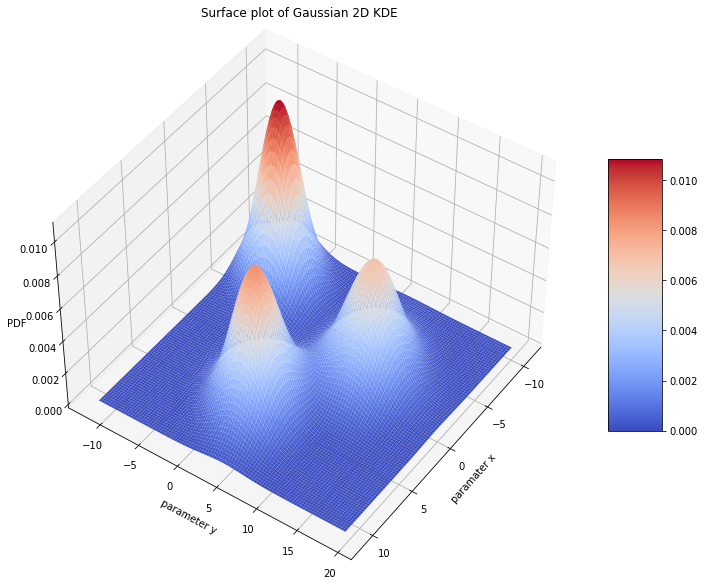

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets import make_blobs

# dummy dataset consisting of 3 blobs
n_components = 3
X, truth = make_blobs(n_samples=500, centers=n_components, cluster_std = [2, 1.5, 1], random_state=42)

# For fitting the gaussian kernel, we specify a meshgrid which will use 100 points interpolation on each axis
# Extract x and y
x = X[:, 0]
y = X[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)

# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# fit a gaussian kernel using the scipy’s gaussian_kde method
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none', )
ax.set_xlabel('paramater x')
ax.set_ylabel('parameter y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(45, 35)

Depending on the problem, the acceptance function can be symmetric or asymmetric irrespective of the proposal distribution. It is asymmetric when $\displaystyle \alpha(x^\prime|x_t) \neq \alpha(x_t|x^\prime)$. In the case of symmetric proposals, ratio $a_2$ becomes 1 and thus the acceptance function takes the following form:

\begin{equation}
\displaystyle \alpha(x^\prime|x_t) = \min \Big\{1,\, \frac{\pi(x^\prime)}{\pi(x_t)} \Big\} = \min \{1,\, a_1 \}
\end{equation}

where $\pi$ is the full joint density. When the proposal distribution is symmetric, i.e the jumping probabilities back and forth are equal

\begin{equation}
q(x_t | x^\prime) = q(x^\prime | x_t)
\end{equation}

the acceptance probability becomes proportional to how likely each of the current state $x_t$ and the proposed state $x^\prime = x_{t+1}$ are under the full joint density.


## Accept or Reject a Proposal

Finally, we accept a given proposal with the acceptance probability $\alpha$ which is the outcome of the acceptance function described above. 

The $\min$ operator in the acceptance function makes sure that the acceptance probability $\alpha$ is never larger than 1. Operationally, we draw a random number uniformly between 0 and 1, and if this value is smaller than $\alpha$, we accept the proposal; otherwise we reject it.

# Example: Simple inference with a Metropolis sampler

Let's conduct the Metropolis algorithm for the trivial example of a Gaussian distribution centered at zero (μ=0) with a standard deviation σ=1.

We can choose our proposal function $q$ to be a Gaussian centered at $x_i$ during the random walk with σ=0.05. At every step, we are going to take a normal distribution around it and step somewhere in that.

The random walk is clearly symmetric.

In [3]:
from scipy.stats import norm, uniform
import numpy as np
import pandas as pd

#number of iterations
n = 50000
#initialization
x = np.zeros(n)
#initial guess, expecting to converge quickly to the preferred value
x[0] = 0.5
for i in range(n-1):
    
    # proposal/candidate point c from a distribution q centered at the previous point
    xc = np.random.normal(x[i], 0.05, 1)[0]
    
    # random number drawn uniformly between 0 and 1
    rand = uniform.rvs(0, 1)
    
    # Trying to simulate a Gaussian with μ=0, σ=1
    # divide the proposed unnormalized posterior to the current position's unnormalized posterior 
    # aka jumping distribution
    A = min(1, norm.pdf(xc) / norm.pdf(x[i]))
    
    if rand < A:
        x[i+1] = xc # set it as the next point in the chain 
    else:
        x[i+1] = x[i] # propse the current state as the next one

In [4]:
x = pd.Series(x, name="x Variable")
x.describe()

count    50000.000000
mean         0.137424
std          0.937902
min         -2.916671
25%         -0.542395
50%          0.050541
75%          0.774747
max          3.089462
Name: x Variable, dtype: float64

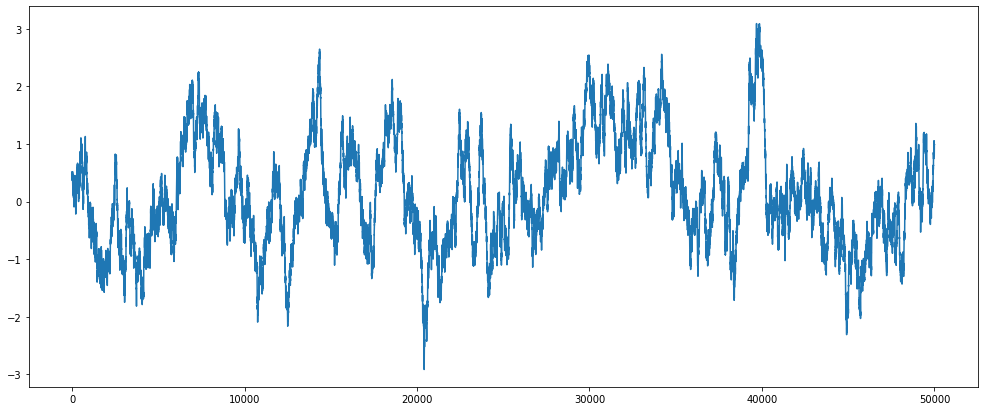

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(17, 7))
plt.plot(x)

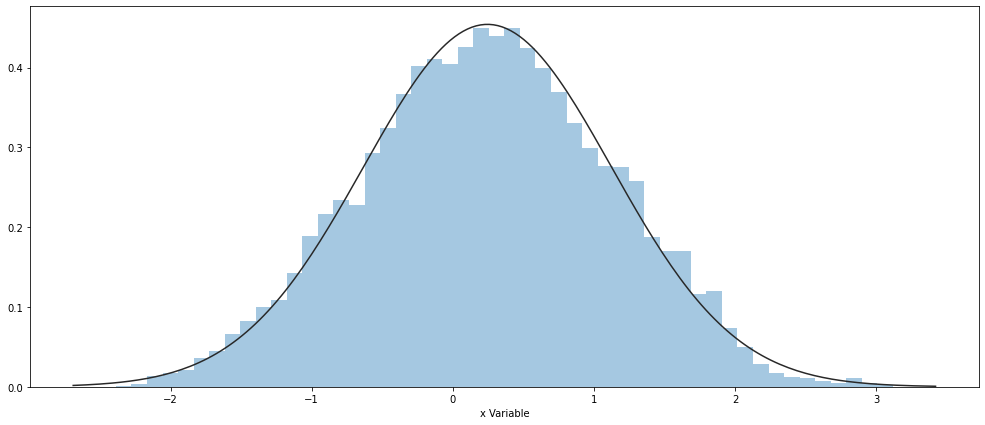

In [5]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(17, 7))
ax = sns.distplot(x, fit=norm, kde=False, rug=False, ax=ax)

# Example: Simple model of covariation & inference with a MH sampler


## The model

Now we are going to illustrate the MH algorithm on another trivial example. 
Consider two streams of observations $\{x,\,N\}$ and $\{y,\,N\}$. 
We are interested in modeling the correlation $\rho$ between these two streams. 
We model the observations given the correlation as a bivariate Gaussian distribution:

\begin{equation}
\{x,\,y | \rho\}  \sim \mathrm{Normal}(\mu,\,\Sigma)
\end{equation}

where

\begin{equation}
\mu = [\mu_x,\, \mu_y]
\end{equation}

and

\begin{equation}
\Sigma = \begin{bmatrix} \sigma_{xx} & \rho \\ \rho & \sigma_{yy}\end{bmatrix} 
\end{equation}

For simplicity, we assume that we know $\mu_x = \mu_y = 0$ and $\sigma_{xx} = \sigma_{yy} = 1$. In this case, the
likelihood function takes the following form:


\begin{equation}
p(x_i,\,y_i | \rho) = \prod_{i=1}^{N} \frac{1}{2\pi \sqrt{1-\rho^2}} e^{- \frac{1}{2(1-\rho^2)}(x_i^2 - 2\rho x_i y_i + y_i^2)}
\end{equation}

To fully specify of the model, we need to define a **prior distribution over the correlation parameter** $\rho$. 
A non-informative prior for covariance matrices is the "Jeffrey" prior -- see Gelman et al., 1995, [Wikipedia](https://en.wikipedia.org/wiki/Jeffreys_prior), which is of the form $\Sigma^{-3/2}$. In our case, the Jeffreys prior takes the following form:



\begin{equation}
p(\rho) = \frac{1}{|\Sigma|^\frac{3}{2}} = \frac{1}{\begin{vmatrix} 1 & \rho \\ \rho & 1 \end{vmatrix}^\frac{3}{2}} = \frac{1}{(1-\rho^2)^{\frac{3}{2}}}
\end{equation}

The Bayes theorem tells that the posterior probabilities are proportional to the **prior distribution** times the **likelihood function**:

\begin{equation}
{\displaystyle P(A|B)\propto P(A)\cdot P(B|A)}
\end{equation}

Using the Bayes rule,we write the **posterior distribution** for the correlation parameter $\rho$ in the
following way:

\begin{equation}
 p(\rho | \{x_i,\, N\}, \,\{y_i,\, N\}) = \propto \frac{1}{(1-\rho^2)^{\frac{3}{2}}} \times \prod_{i=1}^{N} \frac{1}{2\pi \sqrt{1-\rho^2}} e^{- \frac{1}{2(1-\rho^2)}(x_i^2 - 2\rho x_i y_i + y_i^2)}
\end{equation}

## Inference with a MH sampler

The posterior in Equation 7 doesn’t appear to be of any known form. 

Therefore, Gibbs sampling is not straightforward. Instead, we develop a random-walk MH algorithm to infer
the posterior distribution  $p(\rho | \{x_i,\, N\}, \,\{y_i,\, N\})$.

Our model has only **one variable**, $\rho$. There are two things we need to specify to
fully develop an MH sampler, namely:
1. the proposal distribution $q$; and
2. the acceptance function $\cal A$.


To make the algorithm more straightforward, both conceptually and computationally, we can choose to work with a symmetric distribution. 

In particular, we can use a Uniform distribution centered at the current value of $\rho$ with an overall width of $\chi=0.2$, namely

\begin{equation}
\rho_\mathrm{cand} = \rho_{i+1} = \rho^\prime = \sim \mathrm{Uniform} (x_i - \chi,\, x_i + \chi)
\end{equation}

Our choice of proposal distribution is not unique. We could have chosen a wider
or a narrower Uniform distribution. 

Furthermore, we could have worked with a Gaussian distribution or perhaps an asymmetric proposal distribution. 
A good rule of thumb is that a good proposal distribution maintains the acceptance rate of proposals in a reasonable range.

That is, if nearly all candidate samples are being rejected (low acceptance rate) or if nearly
all candidates are being accepted (high acceptance rate), then it is likely that the proposal
distribution is either too wide or too narrow, respectively.

Under this symmetric proposal distribution, the acceptance function can be obtained using Equation 1 from above

\begin{equation}
\displaystyle \alpha(\rho^\prime=\rho_i|\rho_{i-1}) = \min \Big\{1,\, \frac{\pi(x^\prime)}{\pi(x_t)} \Big\} = \min \Big\{1,\, \frac{p(\rho_i | \{x,\, N\}, \,\{y,\, N\})}{ p( \rho_{i-1} | \{x,\, N\}, \,\{y_i,\, N\}) } \Big\}
\end{equation}

where $p$ is given from above.



## Simulation

We simulated a single chain for 10000 steps.

Iteration 0/10000
Iteration 1000/10000
Iteration 2000/10000
Iteration 3000/10000
Iteration 4000/10000
Iteration 5000/10000
Iteration 6000/10000
Iteration 7000/10000
Iteration 8000/10000
Iteration 9000/10000
Acceptance ratio is 0.3763
Mean ρ is 0.4236384987913544
Std for ρ is 0.028259233323330628
Compare with numpy.cov function:
[[1.06929016 0.43011883]
 [0.43011883 0.94583899]]


Text(0, 0.5, 'count')

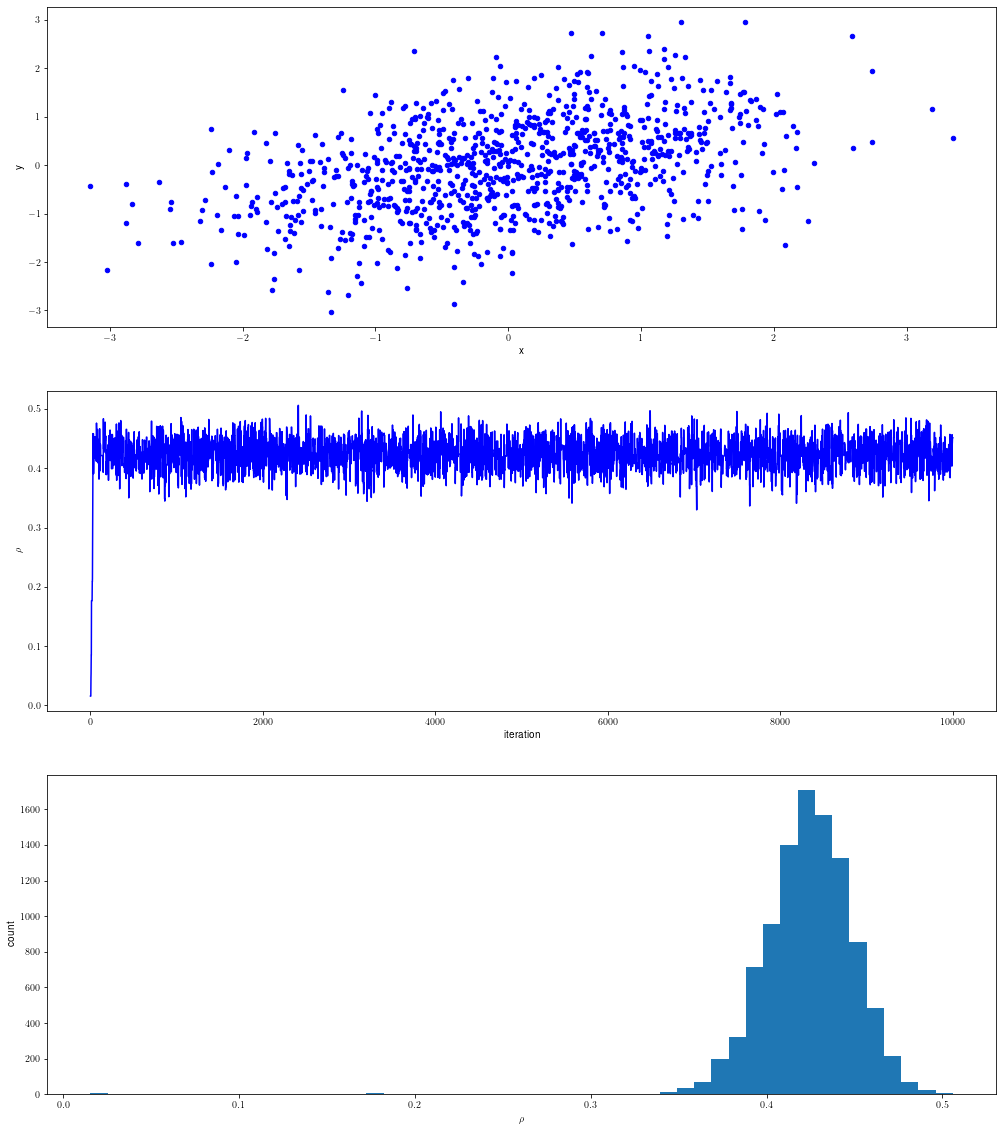

In [6]:
from scipy.stats import uniform, gamma, poisson
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multinomial, multivariate_normal

#latex rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

# fix the random seed for replicability.
np.random.seed(12345678)

# Generate data that represent our hypothetically complex system
N=1000
data=multivariate_normal([0,0],
                         [[1, 0.4],
                          [0.4, 1]],
                         N)
x=data[:,0]
y=data[:,1]

# number of iterations
E=10000


# optionally define burn-in cycles (sampled states will be muted)
BURN_IN=0

# Initialize the chain. 
ρ=0 # as if there's no correlation at all.

# Store the samples
chain_ρ = np.array([0.]*(E-BURN_IN))

def posterior_log(N, ρ, x, y):
    # transform equations in log domain to avoid underflow
    return -3./2*np.log(1. - ρ**2) - N*np.log((1. - ρ**2)**(1./2)) - \
            sum(1./(2.*(1. - ρ**2))*(x**2 - 2.*ρ*x*y + y**2))

steps=round(E/10)
accepted_number=0.
for e in range(E):
    #print progress out
    if not e%steps:
        print (f"Iteration {e}/{E}")

    # Draw a value from the proposal distribution, Uniform(ρ-α,ρ+α)
    α=0.1
    ρ_candidate=uniform.rvs(loc=ρ-α, scale=2*α, size=1)

        
    # Compute the acceptance probability.
        
    #enumerator of Eq. (9)
    accept_enum = posterior_log(N, ρ_candidate, x, y)
    
    #denominator of Eq. (9)
    accept_denom = posterior_log(N, ρ, x, y)
    
    #altogether (log(A/B) = log(A) - log(B))
    accept=accept_enum - accept_denom
    accept=min([0,accept])
    accept=np.exp(accept)
    
    # Accept ρ_candidate with probability accept.
    if uniform.rvs(0,1)<accept:
        ρ=ρ_candidate
        accepted_number+=1
    else:
        ρ=ρ
        
    # store
    if e>=BURN_IN:
        chain_ρ[e-BURN_IN]=ρ

print ("Acceptance ratio is "+str(accepted_number/(E)))
print ("Mean ρ is "+str(chain_ρ.mean()))
print ("Std for ρ is "+str(chain_ρ.std()))
print ("Compare with numpy.cov function:\n"+str(np.cov(data.T)))

# Plot the data
fig, (ax1,ax2,ax3)=plt.subplots(3,1, figsize=(17,20))

ax1.scatter(x,y,s=20,c='b',marker='o')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(chain_ρ,'b')
ax2.set_xlabel('iteration')
ax2.set_ylabel(r'$\rho$')

ax3.hist(chain_ρ,50)
ax3.set_xlabel(r'$\rho$')
ax3.set_ylabel('count')

Figure: *The top plot shows the random data generated using a multivariate normal PDF*.

*A trace plot for ρ is shown in the middle row. The thick pencil pattern (Gelman et al., 1995) indicates that the chain converged almost immediately.*

*The bottom row shows the posterior distribution $p(\rho| \{x,\,N\},\,\{y,\,N\} )$ in a histogram plot based upon the posterior samples.*

# Example: A more complex system with cost function

Imagine now the case where a system is describing a phenomenon (e.g., a pricing model) with 3 parameters but unknown posterior probability distribution function. Estimating the expected value with the less cost is implausible since the integration of its higher-dimensional phase-space involves intactable integrals.

\begin{equation}
\min \mathrm{Cost} = f(\tilde{x},\,\tilde{y},\,\tilde{z})
\end{equation}

where  $\tilde{x}$ are the model parameters that minimize cost.

We can, however, attack this problem with an MCMC approach.

In [27]:
from scipy.stats import norm, uniform, crystalball
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c1, μ1, σ1 = 1.0, 0.0, 0.1 
c2, μ2, σ2 = 1.0, 1.0, 0.5
c3, μ3, σ3 = 1.0, 10.0, 1.0


def propose_candidates(x, y, z):
    """Propose candidate states from normal priors"""
    return np.random.normal(x, σ1, 1)[0], np.random.normal(y, σ2, 1)[0], np.random.normal(z, σ3, 1)[0]

def gaussian(x, c, μ, σ):
    return c * np.exp(-np.power(x - μ, 2.) / (2 * np.power(σ, 2.)))

def dummy_model(x,y,z):
    """Combination of guassian functions"""
    return  gaussian(x, c1, μ1, σ1) + gaussian(y, c2, μ2, σ2) + gaussian(z, c3, μ3, σ3)

#number of iterations
n = 100000

#initialization
x = np.zeros(n)
y = np.zeros(n) 
z = np.zeros(n)
cost = np.zeros(n)
A = np.zeros(n)

#initial guess, expecting to converge quickly to the preferred value
x[0] = 1.0
y[0] = 1.0
z[0] = 1.0
cost[0] = dummy_model(x[0], y[0], z[0])

# cost regulator coefficient
λ = 1

#Start MC process
for i in range(n-1):
     
    # proposal/candidate point c from a distribution q centered at the previous point (model trace)
    x_c, y_c, z_c = propose_candidates(x[i], y[i], z[i])

    # cost function of proposed state in Markov Chain ()
    cost_c = dummy_model(x_c, y_c, z_c)
    

    # random number drawn uniformly between 0 and 1
    rand = uniform.rvs(0,1)
    
    # cost difference between current state and proposed state in Markov Chain
    Δ = cost_c - cost[i]
   
    # acceptance chance
    A[i] = np.exp(-λ * Δ)
    #A[i] = min(1, cost[i] / cost_c)
    
    # perform accept/reject test
    if rand < A[i]:
        x[i+1], y[i+1], z[i+1] = x_c, y_c, z_c 
        cost[i+1] = cost_c
    else:
        x[i+1] = x[i]
        cost[i+1] = cost[i]

## Acceptance Function

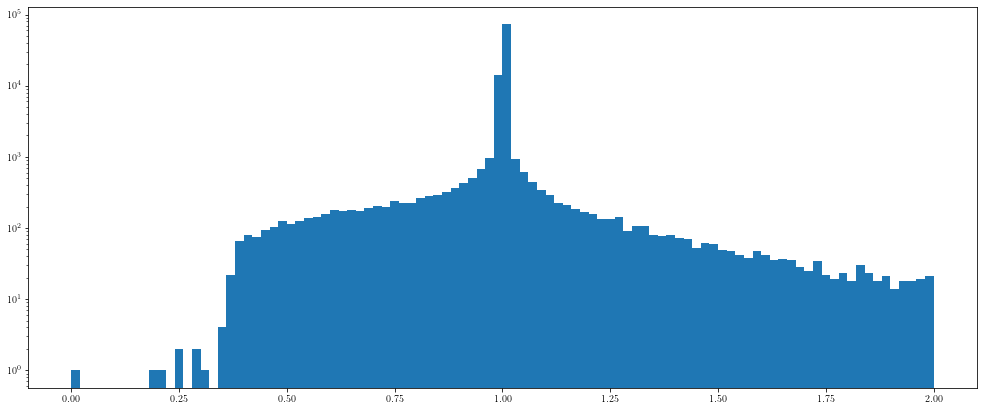

In [28]:
fig, ax = plt.subplots(figsize=(17, 7))
plt.hist(A, bins=100, range=(0,2), log=True);

## Cost

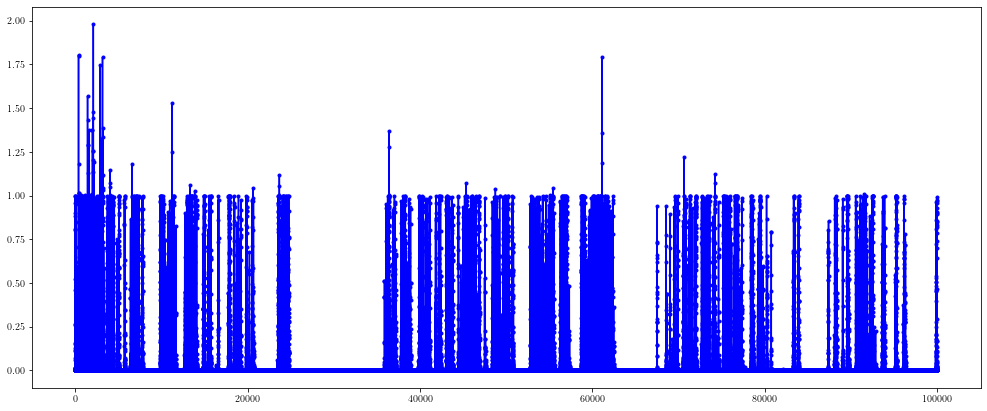

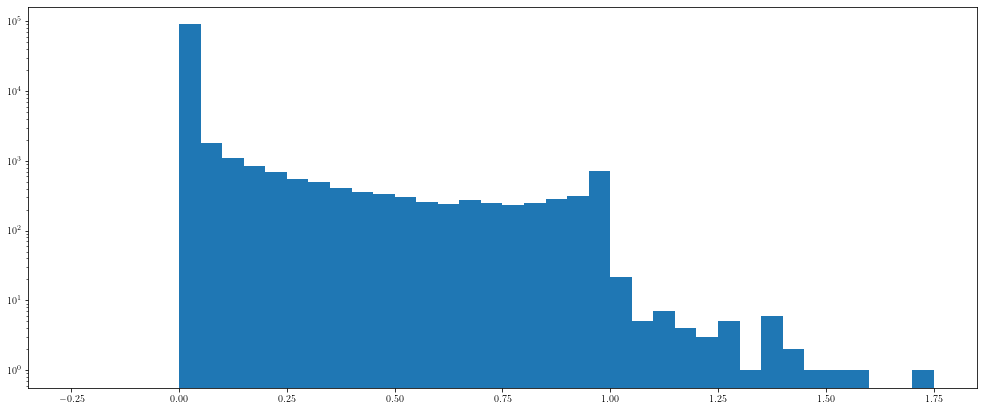

In [29]:
fig, ax = plt.subplots(figsize=(17, 7))
plt.plot(cost, '.b-')

fig, ax = plt.subplots(figsize=(17, 7))
ax = plt.hist(cost, log=True, bins=40, range=(-0.25, 1.75))

## Parameter x

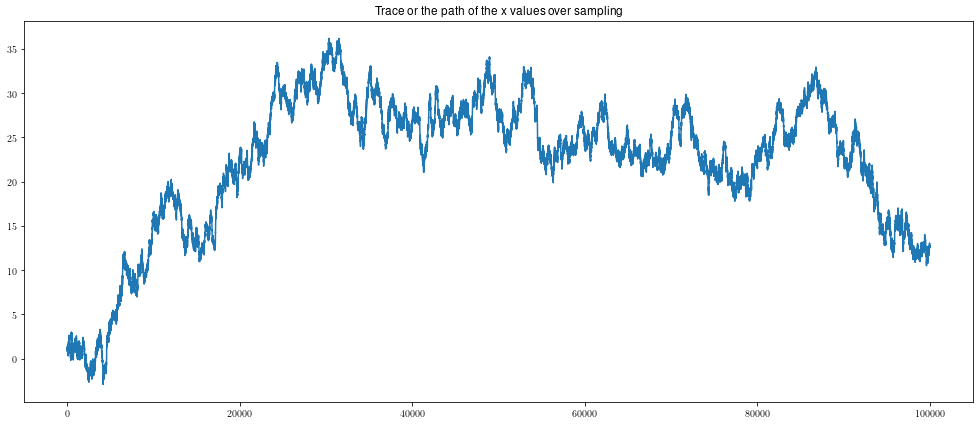

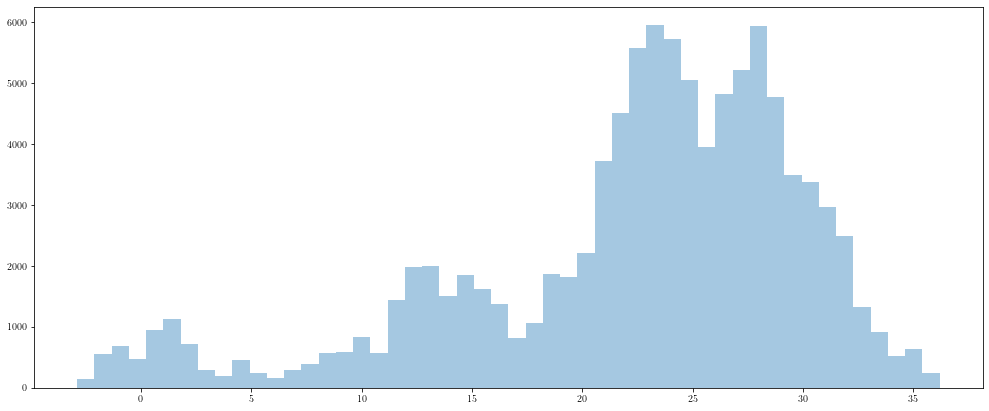

In [37]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.set_title("Trace or the path of the x values over sampling")
plt.plot(x)

fig, ax = plt.subplots(figsize=(17, 7))
ax = sns.distplot(x, kde=False, rug=False, ax=ax)

## Parameter y

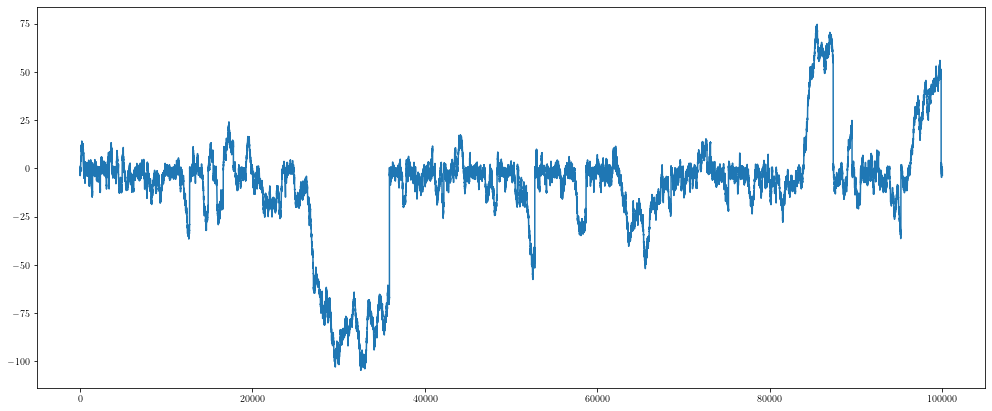

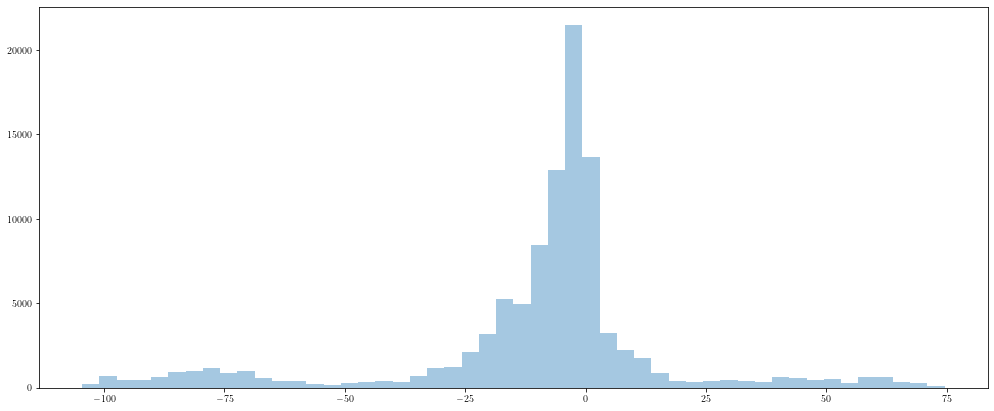

In [31]:
fig, ax = plt.subplots(figsize=(17, 7))
plt.plot(y)

fig, ax = plt.subplots(figsize=(17, 7))
ax = sns.distplot(y, kde=False, rug=False, ax=ax)

## X vs Y Phase Exploration

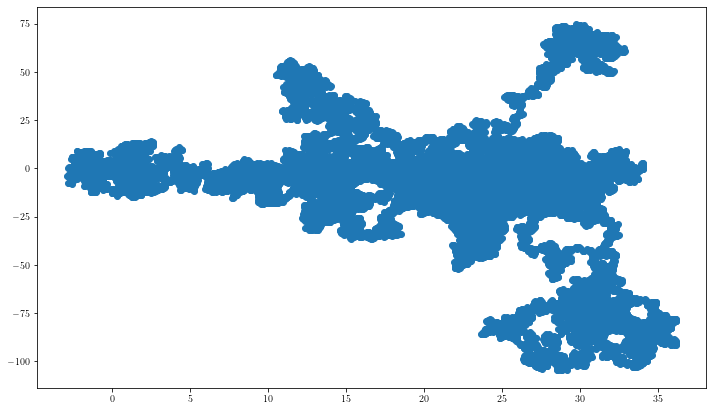

In [32]:
fig, ax = plt.subplots(figsize=(12,7))
plt.scatter(x,y)

## Parameter z

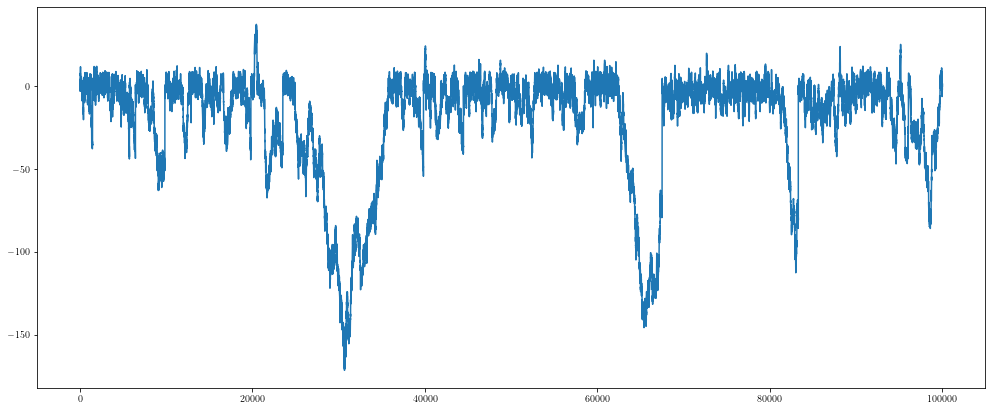

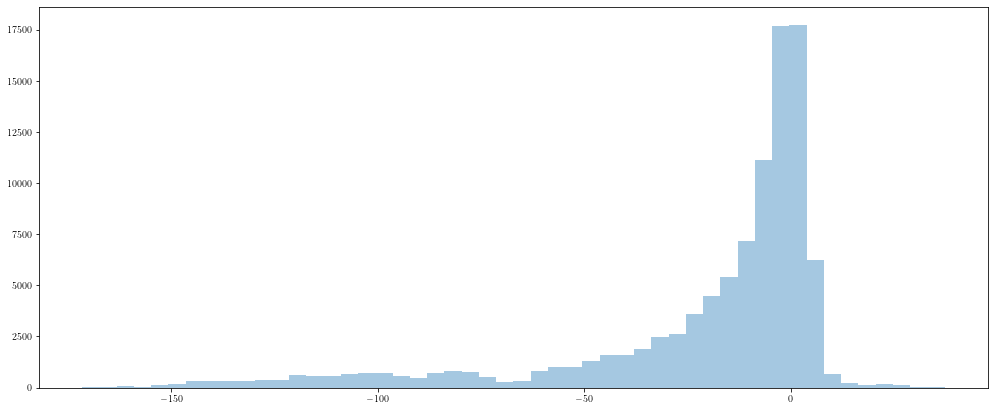

In [33]:
fig, ax = plt.subplots(figsize=(17, 7))
plt.plot(z)

fig, ax = plt.subplots(figsize=(17, 7))
ax = sns.distplot(z, kde=False, rug=False, ax=ax)

# Synopsis

Metropolis-Hastings is the simplest and the best known algorithm from the Markov Chain Monte Carlo (MCMC) family.

This is a way to do a **depending sampling** from a particular probability distribution density and calculate expected values from it. Can be also used to infer which are the most likely values that the parameters of a model will take. This method is very useful when the posterior function is complicated in higher dimensions and thus solving the problem analytically is impossible since its invloved integrals are intractable. The same result can be obtained though by using simple prior functions, proposal distributions or transition functions.

I hope you have gotten a good intuitive idea of how the simple MH MCMC works and how to actually apply it to real world problems. 

# References

Lynch, S. M. (2007). Introduction to Applied Bayesian Statistics and Estimation for Social Scientists. New York:
Springer

Lambert Ben, Bayesian Statistics

# Appendix

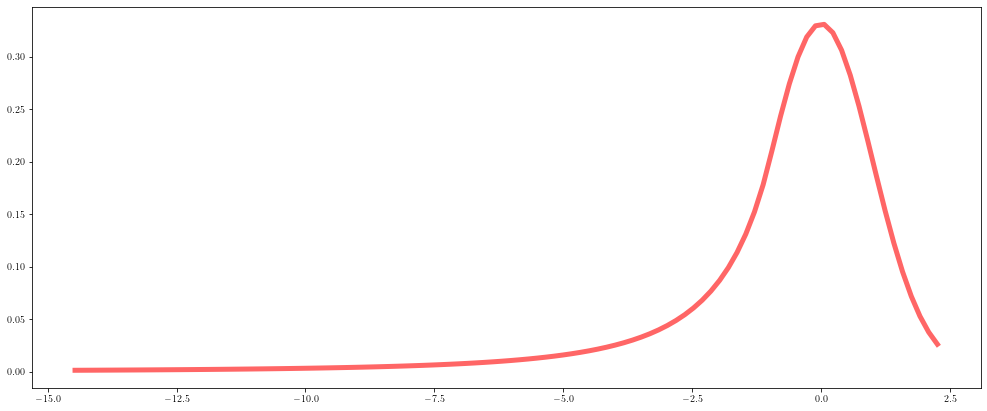

In [35]:
from scipy.stats import crystalball

beta, m = 1, 3
mean, var, skew, kurt = crystalball.stats(beta, m, moments='mvsk')

X = np.linspace(crystalball.ppf(0.01, beta, m),
                crystalball.ppf(0.99, beta, m), 100)

fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(X, crystalball.pdf(X, beta, m), 'r-', lw=5, alpha=0.6, label='crystalball pdf')

(array([ 7., 13., 16., 22., 18., 10.,  9.,  1.,  3.,  1.]),
 array([-1.59999057, -1.07014489, -0.5402992 , -0.01045352,  0.51939216,
         1.04923784,  1.57908352,  2.10892921,  2.63877489,  3.16862057,
         3.69846625]),
 <BarContainer object of 10 artists>)

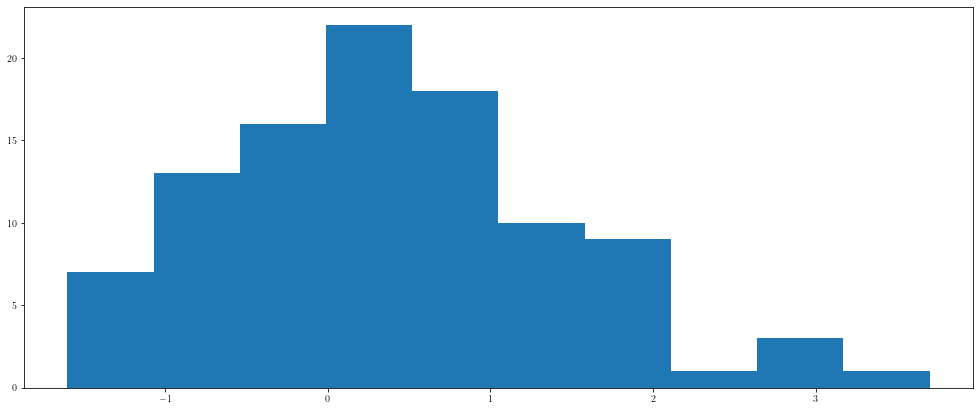

In [7]:
fig, ax = plt.subplots(figsize=(17, 7))
plt.hist(np.random.normal(loc=0.5, scale=1, size=100))
